Enter the stress values separated by spaces (e.g., 7 8.74 10.14):


 12.2 12.4 13 14


Enter the corresponding strain values separated by spaces (e.g., 1 2 3):


 1.2 1.2 3 4



Model fitting results:
Power-Law Model: k = 12.0432, n = 0.0946, R^2 = 0.8836
Bingham Plastic Model: tau0 = 11.5769, eta = 0.5630, R^2 = 0.9365
Herschel-Bulkley Model: tau0 = 12.2494, k = 0.0296, n = 2.9437, R^2 = 0.9898
Best Model: Herschel-Bulkley


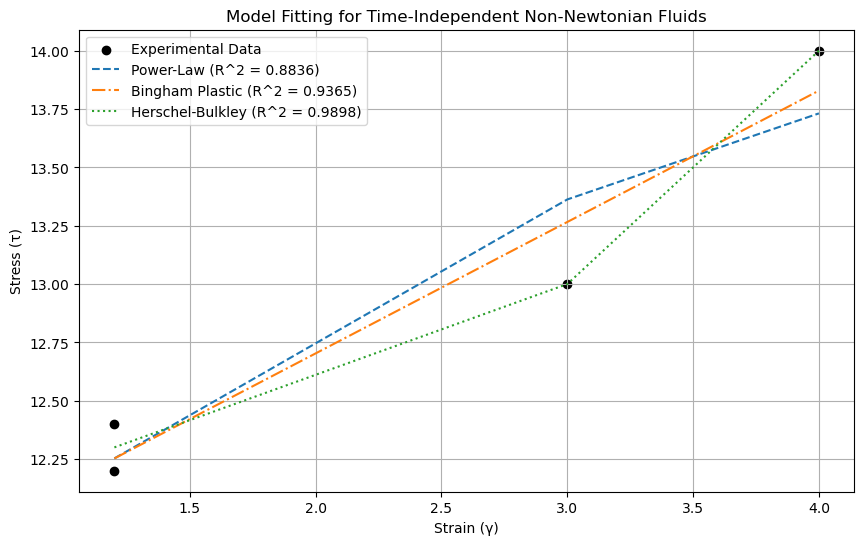

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Prompt user for stress and strain data
print("Enter the stress values separated by spaces (e.g., 7 8.74 10.14):")
stress = np.array([float(x) for x in input().split()])

print("Enter the corresponding strain values separated by spaces (e.g., 1 2 3):")
strain = np.array([float(x) for x in input().split()])

# Check if the input data lengths match
if len(stress) != len(strain):
    raise ValueError("The number of stress and strain values must be the same.")

# Define models
# 1. Power-Law model for shear-thinning/thickening: tau = k * (gamma)^n
def power_law(strain, k, n):
    return k * strain**n

# 2. Bingham Plastic model: tau = tau0 + eta * gamma
def bingham_plastic(strain, tau0, eta):
    return tau0 + eta * strain

# 3. Herschel-Bulkley model: tau = tau0 + k * (gamma)^n
def herschel_bulkley(strain, tau0, k, n):
    return tau0 + k * strain**n

# Fit data to models
# Power-law model
popt_power, _ = curve_fit(power_law, strain, stress, maxfev=10000)
k_power, n_power = popt_power

# Bingham Plastic model
popt_bingham, _ = curve_fit(bingham_plastic, strain, stress, maxfev=10000)
tau0_bingham, eta_bingham = popt_bingham

# Herschel-Bulkley model
popt_hb, _ = curve_fit(herschel_bulkley, strain, stress, maxfev=10000)
tau0_hb, k_hb, n_hb = popt_hb

# Evaluate R-squared for each model
def calculate_r_squared(y_actual, y_pred):
    residuals = y_actual - y_pred
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y_actual - np.mean(y_actual))**2)
    return 1 - (ss_res / ss_tot)

# Predictions for each model
stress_power_pred = power_law(strain, k_power, n_power)
stress_bingham_pred = bingham_plastic(strain, tau0_bingham, eta_bingham)
stress_hb_pred = herschel_bulkley(strain, tau0_hb, k_hb, n_hb)

# R-squared values
r2_power = calculate_r_squared(stress, stress_power_pred)
r2_bingham = calculate_r_squared(stress, stress_bingham_pred)
r2_hb = calculate_r_squared(stress, stress_hb_pred)

# Identify the best model
models = ["Power-Law", "Bingham Plastic", "Herschel-Bulkley"]
r2_scores = [r2_power, r2_bingham, r2_hb]
best_model = models[np.argmax(r2_scores)]

# Print results
print("\nModel fitting results:")
print(f"Power-Law Model: k = {k_power:.4f}, n = {n_power:.4f}, R^2 = {r2_power:.4f}")
print(f"Bingham Plastic Model: tau0 = {tau0_bingham:.4f}, eta = {eta_bingham:.4f}, R^2 = {r2_bingham:.4f}")
print(f"Herschel-Bulkley Model: tau0 = {tau0_hb:.4f}, k = {k_hb:.4f}, n = {n_hb:.4f}, R^2 = {r2_hb:.4f}")
print(f"Best Model: {best_model}")

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(strain, stress, color='black', label='Experimental Data')
plt.plot(strain, stress_power_pred, label=f'Power-Law (R^2 = {r2_power:.4f})', linestyle='--')
plt.plot(strain, stress_bingham_pred, label=f'Bingham Plastic (R^2 = {r2_bingham:.4f})', linestyle='-.')
plt.plot(strain, stress_hb_pred, label=f'Herschel-Bulkley (R^2 = {r2_hb:.4f})', linestyle=':')

plt.xlabel('Strain (γ)')
plt.ylabel('Stress (τ)')
plt.title('Model Fitting for Time-Independent Non-Newtonian Fluids')
plt.legend()
plt.grid()
plt.show()
